In [37]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [38]:
def synthetic_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))


In [39]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
# torch.Size([1000, 1])
# print(labels.shape) 

In [40]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 0.7079, -0.0595]) 
label: tensor([5.8219])


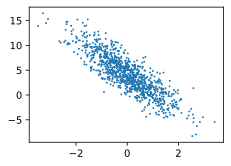

In [41]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [42]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [43]:
batch_size = 10
# print(features[:10], labels[:10])
print(features.shape)
for x, y in data_iter(batch_size, features, labels):
    print(x, '\n', y)
    break

torch.Size([1000, 2])
tensor([[-1.0967,  0.7413],
        [ 0.1009,  0.8851],
        [ 1.7333, -0.3351],
        [ 2.4329, -0.4558],
        [ 0.7224,  0.3992],
        [ 0.1539, -0.4295],
        [-0.9718,  0.6505],
        [-0.0808, -1.2777],
        [ 1.0681,  0.4375],
        [ 1.7597, -0.5866]]) 
 tensor([[-0.5167],
        [ 1.3931],
        [ 8.8024],
        [10.6191],
        [ 4.2921],
        [ 5.9777],
        [ 0.0667],
        [ 8.3942],
        [ 4.8473],
        [ 9.7087]])


In [44]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [45]:
def linreg(x, w, b):
    return torch.matmul(x, w) + b

In [46]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [47]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [48]:
lr = 0.03
num_epochs = 3
model = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(model(x, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(model(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_l.mean()):f}')
            


epoch1, loss 0.040661
epoch2, loss 0.000156
epoch3, loss 0.000051


In [49]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0006, -0.0007], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0008], grad_fn=<RsubBackward1>)
